In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
df=pd.read_csv('C:/Users/Ankan/Downloads/final_gc_anolomy.csv')

In [2]:
df['timestamp'] = pd.to_datetime(df['timestamp'], infer_datetime_format=True)
df  = df[df['building_number']==2]
df.tail()

,timestamp,main_meter,sub_meter_1,sub_meter_2,building_number,weekend,corporate,main_meter_4,main_meter_12,day of week_0,day of week_1,day of week_2,day of week_3,day of week_4,day of week_5,day of week_6
13195,2017-12-31 19:00:00,4221.350523,1417.637935,0.843408,2,1,1,6195.801495,6585.358805,0,0,0,0,0,0,1
13196,2017-12-31 20:00:00,4055.175021,1222.050850,1.051205,2,1,0,3792.986701,6585.358805,0,0,0,0,0,0,1
13197,2017-12-31 21:00:00,3956.379650,1319.480111,2.996915,2,1,0,3792.986701,6585.358805,0,0,0,0,0,0,1
13198,2017-12-31 22:00:00,3693.744589,1254.241443,1.799864,2,1,0,3792.986701,6585.358805,0,0,0,0,0,0,1
13199,2017-12-31 23:00:00,3466.647545,881.760210,1.675097,2,1,0,3792.986701,6585.358805,0,0,0,0,0,0,1


In [3]:
df=df.drop(columns=['main_meter','sub_meter_1','building_number','weekend','corporate','main_meter_4','main_meter_12','day of week_0','day of week_1','day of week_2','day of week_3','day of week_4','day of week_5','day of week_6'])
df=df.set_index('timestamp')
df.head()

,sub_meter_2
timestamp,
2017-01-04 00:00:00,0.000000
2017-01-04 01:00:00,2.436016
2017-01-04 02:00:00,1.840612
2017-01-04 03:00:00,0.142222
2017-01-04 04:00:00,1.164588


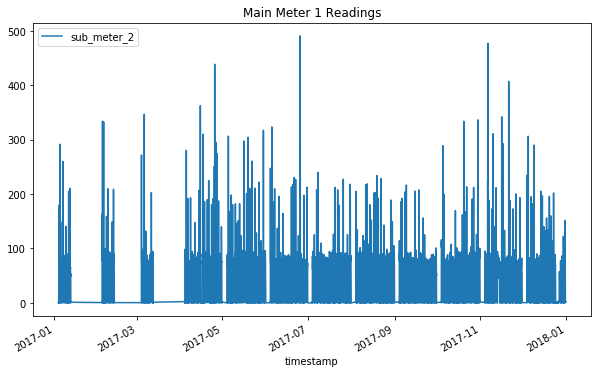

In [4]:
from plotly.offline import plot
import cufflinks as cf
df.plot(title="Main Meter 1 Readings", figsize=(10,6))

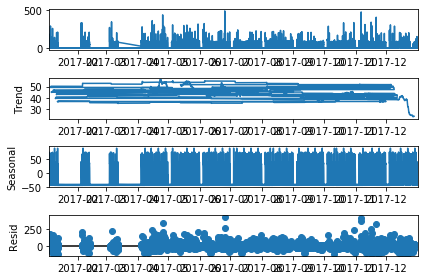

In [5]:
from chart_studio.plotly import plot_mpl
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df, model='additive',period=168)
fig=result.plot()

In [9]:
from pmdarima import auto_arima
stepwise_model = auto_arima(df, start_p=1, start_q=1,
                           max_p=5, max_q=5,
                           start_P=0, seasonal=False,
                           d=0, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

Fit ARIMA: order=(1, 0, 1); AIC=65993.423, BIC=66020.602, Fit time=0.912 seconds
Fit ARIMA: order=(0, 0, 0); AIC=69842.143, BIC=69855.733, Fit time=0.000 seconds
Fit ARIMA: order=(1, 0, 0); AIC=65991.456, BIC=66011.840, Fit time=0.047 seconds
Fit ARIMA: order=(0, 0, 1); AIC=67061.193, BIC=67081.578, Fit time=0.085 seconds
Fit ARIMA: order=(2, 0, 0); AIC=65993.430, BIC=66020.609, Fit time=0.133 seconds
Fit ARIMA: order=(2, 0, 1); AIC=65993.764, BIC=66027.738, Fit time=0.964 seconds
Total fit time: 2.140 seconds
65991.45578691023


In [10]:
train = df.loc['01-04-2017 00:00:00':'07-11-2017 00:00:00']
test = df.loc['07-11-2017 00:00:00':]
stepwise_model.fit(train)

ARIMA(callback=None, disp=0, maxiter=None, method=None, order=(1, 0, 0),
      out_of_sample_size=0, scoring='mse', scoring_args={}, seasonal_order=None,
      solver='lbfgs', start_params=None, suppress_warnings=True,
      transparams=True, trend=None, with_intercept=True)

In [11]:
future_forecast = stepwise_model.predict(n_periods=1320)
future_forecast

array([18.4049145 , 28.89426918, 35.43452361, ..., 46.26608657,
       46.26608657, 46.26608657])

In [12]:
a=pd.DataFrame(data=future_forecast)
a.to_csv('updatedb2m3.csv')

# add the code to show actual vs predicted
